# 7.2 Derivative-based optimization

In this section, we introduce three derivative-based optimization methods for unconstrained optimization methods.

## Newton's method

Newton's method was introduced in Chapter 2.3 as an iterative method for solving nonlinear equations. It can also be used for numerical optimization. Consider a univariate unimodal function $f(x)$ on the interval $[a,b]$. The derivative of $f$ equals $0$ where the extremum is located. Therefore, the optimization problem $\min{f(x)}$ or $\max{f(x)}$ is converted to solving a nonlinear equation $f'(x)=0$. Applying Newton's method to the equation, the iterative formula is:
\begin{equation}\label{eq:newton_opt}
x_{i+1} = x_{i} - \frac{f'(x_{i})}{f''(x_{i})}
\end{equation}

The following Python function **newton_opt** performs optimization with Newton's method. The code is almost identical to the one used for solving nonlinear equations, with the input functions changed to the first and second derivatives of $f$.

In [1]:
import numpy as np

In [2]:
def newton_opt(fprime, fdprime, pin, eps, N):
    """
    Optimizatin using Newton's method
    input:
    fprime: function, the first-order derivative function
    fdprime: function, the second-order derivative function
    pin: float, the initial guess of the extremizer
    eps: float, the tolerance for stopping the algorithm
    N: int, the maximum number of steps to run
    """
    n = 1
    while n <= N:
        p = pin - fprime(pin)/fdprime(pin)
        if np.isclose(fprime(p), 0) or np.abs(p-pin) < eps:
            print('p is ', p, ' and the iteration number is ', n)
            return p
        pin = p
        n += 1
    y = fprime(p)
    print('Newton method did not converge. The last iteration gives ', 
          p, ' with derivate value ', y)

We revisit the polynomial function describe in Section 7.1, and use Newton's method to find the minimum. Note that the initial guess should be sufficiently close to the extremizer; otherwise, the algorithm may not converge, or it simply converges to other extremizers that are also solutions to the equation $f'(x)=0$. 

\begin{example}\label{example:newton_exa1}
Find the minimum of the polynomial
\begin{equation*}
f(x) = 3x^4+2x^2-x-1
\end{equation*}
\end{example}

We already know the minimizer is close to $0.22$, so we use $x_0=0.0$ as the initial guess.

In [3]:
def f(x):
    return 3*x**4+2*x**2-x-1

def fprime(x):
    return 12*x**3+4*x-1

def fdoubleprime(x):
    return 36*x**2+4

In [4]:
eps = 1e-5
N = 200
pin = -0.
p = newton_opt(fprime, fdoubleprime, pin, eps, N)
print('The function f has a minimum of ', f(p), ' at ', p)

p is  0.21864332906295134  and the iteration number is  4
The function f has a minimum of  -1.1161775914507224  at  0.21864332906295134


Newton's method can also be applied to multivariate cost functions in the form of $f(x_1,x_2,\dots,x_d)$, where $d$ is the number of variables. The iterative formula Eqn. \eqref{eq:newton_opt} needs to be modified, since the scalar $f'(x)$ becomes the gradient vector of $f$, 
\begin{equation*}
\nabla f = \left[\frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2},\dots,\frac{\partial f}{\partial x_d}\right]^T
\end{equation*}
and the scalar $f''(x)$ becomes the Hessian matrix,
\begin{equation*}
H_f =
\begin{bmatrix}
\frac{\partial^2 f}{\partial^2 x_1} & \frac{\partial^2 f}{\partial x_1 \partial x_2} & \dots & \frac{\partial^2 f}{\partial x_1 \partial x_d} \\
\frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial^2 x_2} & \dots & \frac{\partial^2 f}{\partial x_2 \partial x_d} \\
\vdots & \vdots & \cdots & \vdots \\
\frac{\partial^2 f}{\partial x_d \partial x_1} & \frac{\partial^2 f}{\partial x_d \partial x_2} & \dots & \frac{\partial^2 f}{\partial^2 x_d} \\
\end{bmatrix}
\end{equation*}
The ratio of scalars in Eqn. \eqref{eq:newton_opt} is now replaced by the solution of the linear system:
\begin{equation}\label{eq:newton_opt_u}
H_f\boldsymbol{u} = \nabla f
\end{equation}
and the iterative formula for finding the extremizer of the multivariate function $f(x_1,\dots,x_d)$ can be formulated as
\begin{equation}\label{eq:newton_opt_mv}
\boldsymbol{x}_{i+1} = \boldsymbol{x}_{i} - \boldsymbol{u}
\end{equation}
where $\boldsymbol{u}$ comes from Eqn. \eqref{eq:newton_opt_u}, where the Hessian matrix and the gradient vector are evaluated at the current estimate $\boldsymbol{x}_{i}$.

The following Python function **newton_opt_mv** performs Newton's method for optimizing multivariate cost functions.

In [5]:
def newton_opt_mv(fgrad, fhessian, pin, eps, N):
    '''
    Multivariate Newton's method for optimization
    input:
    fgrad: function, the function that returns gradient
    fhessian: function, the function that returns the hessian matrix
    pin: a 1d numpy array of size d, where x=(x_1,...,x_d), the initial guess of the extremizer
    eps: float, the tolerance for stopping the algorithm
    N: int, the maximum number of steps to run
    '''
    d = pin.size # number of variables
    n = 1
    while n <= N:
        p = pin + np.linalg.solve(fhessian(pin), -fgrad(pin))
        if np.all(np.isclose(fgrad(p), np.zeros(d))) or np.linalg.norm(p-pin, ord=np.inf) < eps:
            print('p is ', p, ' and the iteration number is ', n)
            return p
        pin = p.copy()
        n += 1
    y = fgrad(p)
    print('Method did not converge. The last iteration gives ', 
          p, ' with gradient value ', y)

We consider the following 2D function
\begin{equation}\label{eq:2Dexa}
f(x,y) = 2x^2 + 3y^2 + x - y + 3 
\end{equation}
The function has a global minimum in its domain, which can be seen from the following 2D pseudocolor and 3D surface plots.

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm

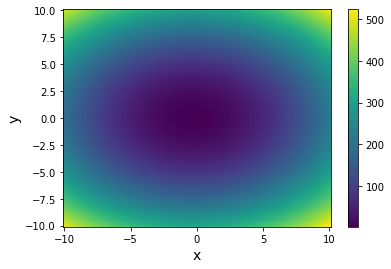

In [7]:
def f(x):
    return 2*x[0]**2+3*x[1]**2+x[0]-x[1]+3

# Make a psudeocolor plot
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
XX, YY = np.meshgrid(x, y, indexing='ij')
ZZ = np.zeros(XX.shape)
for i in range(x.size):
    for j in range(y.size):
        ZZ[i,j] = f([XX[i,j], YY[i,j]])
plt.pcolor(XX, YY, ZZ, shading='nearest')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.colorbar();

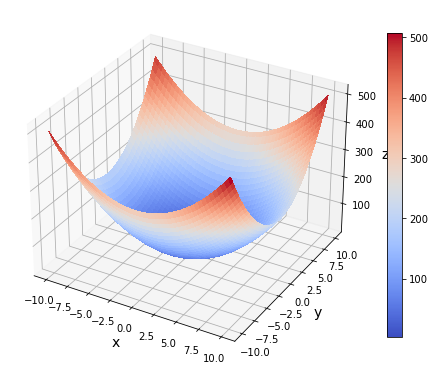

In [8]:
# Make a 3D surface plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8,8))
surf = ax.plot_surface(XX, YY, ZZ, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_zlabel('z', fontsize=14)
fig.colorbar(surf, shrink=0.7);

We can rewrite Eqn. \eqref{eq:2Dexa} by completing squares as
\begin{equation*}
f(x,y) = 2\left(x+\frac{1}{4}\right)^2 + 3\left(y-\frac{1}{6}\right)^2 + \frac{67}{24}
\end{equation*}
So $f$ has a minimum of $\frac{67}{24}$ at the point $\left[-\frac{1}{4}, \frac{1}{6}\right]$.

Apply Newton' method to the function, with an initial vector of $[1,2]$. We can see that the same results are obtained.

In [9]:
def grad(x):
    return np.array([4*x[0]+1, 6*x[1]-1])

def hessian(x):
    return np.array([[4., 0], [0, 6]])

pin = np.array([1., 2])
eps = 1e-5
N = 200
p = newton_opt_mv(grad, hessian, pin, eps, N)
print('The function f has a minimum of ', f(p), ' at ', p)

p is  [-0.25        0.16666667]  and the iteration number is  1
The function f has a minimum of  2.7916666666666665  at  [-0.25        0.16666667]


We now animate the process of Newton's method. The following animation shows the true minimizer, the estimate produced by Newton's method, and the contour plot of the cost function $f(\boldsymbol{x})$.

In [10]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [11]:
# Newton's method for the animation
def newton_mv_nstep(fgrad, fhessian, pin, nstep):
    '''
    Multivariate Newton's method for optimization. The algorithm run nstep steps
    input:
    fgrad: function, the function that returns gradient
    fhessian: function, the function that returns the hessian matrix
    pin: a 1d numpy array of size d, where x=(x_1,...,x_d), the initial guess of the extremizer
    nstep: int, the number of steps to run
    '''
    d = pin.size # number of variables
    p = pin.copy()
    n = 1
    while n <= nstep:
        p = pin + np.linalg.solve(fhessian(pin), -fgrad(pin))
        pin = p.copy()
        n += 1
    return p

# Animation for Newton's method
pin = np.array([1., 2])
true_sol = np.array([-1/4, 1/6])
fig, ax = plt.subplots(figsize=(8,6))
CS = ax.contourf(XX, YY, ZZ, levels=30)
cb = fig.colorbar(CS)
cb.ax.set_ylabel('f(x,y)')
def animate(i):
    ax.cla()
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)  
    ax.contourf(XX, YY, ZZ, levels=30)
    x = newton_mv_nstep(grad, hessian, pin, i)
    ax.plot(x[0], x[1], 'o', color='r', ms=6, label='Newton method')
    ax.plot(true_sol[0], true_sol[1], 's', color='green', ms=6, label='True solution')
    ax.set_title('Newton method : iteration step '+str(i), size=16)
    ax.set_xlabel('$x$', size=16)
    ax.set_ylabel('$y$', size=16)
    ax.legend(loc='upper right')
plt.close()
anim = FuncAnimation(fig, animate, frames=20, interval=1000)
HTML(anim.to_jshtml())

In this case, since $f'(\boldsymbol{x})$ is linear, Newton's method converges to the true minimizer in just one step.

\begin{example}\label{example:newton_opt_sincos}
Apply Newton's method to the following function
\begin{equation*}
f(x,y) = \sin{x}\cos{y}
\end{equation*}
with different initial vectors $\boldsymbol{x}_0$.
\end{example}

We first visualize the cost function.

In [12]:
def f(x):
    return np.sin(x[0])*np.cos(x[1])

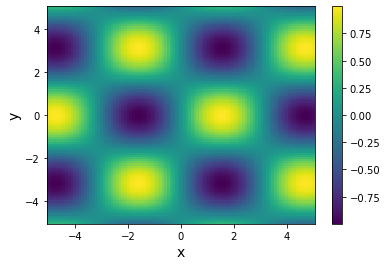

In [13]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
XX, YY = np.meshgrid(x, y, indexing='ij')
ZZ = np.zeros(XX.shape)
for i in range(x.size):
    for j in range(y.size):
        ZZ[i,j] = f([XX[i,j], YY[i,j]])
plt.pcolor(XX, YY, ZZ, shading='nearest')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.colorbar();

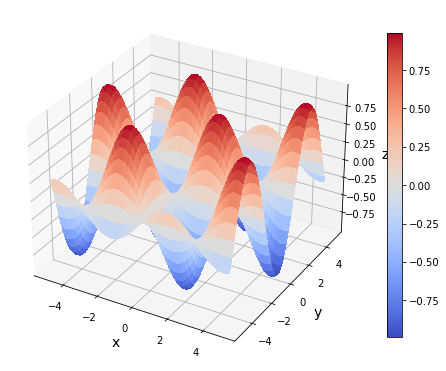

In [14]:
# Make a 3D surface plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8,8))
surf = ax.plot_surface(XX, YY, ZZ, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_zlabel('z', fontsize=14)
fig.colorbar(surf, shrink=0.7);

The plots clearly show that there are infinitely many extrema and minima and maxima alternate. In this case, the choice of the initial guess determines which solution Newton's method converges to. First, we consider using an initial vector of $\boldsymbol{x}_0=[1,3]$, which is close to the point $\left[\frac{\pi}{2}, \pi\right]$, at which $f(x)$ achieves a minimum $\sin\left(\frac{\pi}{2}\right)\cos{\pi}=-1$.

In [15]:
def grad(x):
    return np.array([np.cos(x[0])*np.cos(x[1]), -np.sin(x[0])*np.sin(x[1])])

def hessian(x):
    return np.array([[-np.sin(x[0])*np.cos(x[1]), -np.cos(x[0])*np.sin(x[1])], 
                     [-np.cos(x[0])*np.sin(x[1]), -np.sin(x[0])*np.cos(x[1])]])

In [16]:
pin = np.array([1., 3])
eps = 1e-5
N = 200
p = newton_opt_mv(grad, hessian, pin, eps, N)
print('The function f has a minimum of ', f(p), ' at ', p)

p is  [1.57079633 3.14159265]  and the iteration number is  3
The function f has a minimum of  -1.0  at  [1.57079633 3.14159265]


The results are in agreement with what we expected. Now consider another initial vector $\boldsymbol{x}_0=[4, 3]$ and apply Newton's method again.

In [17]:
pin = np.array([4., 3])
eps = 1e-5
N = 200
p = newton_opt_mv(grad, hessian, pin, eps, N)
print('The function f has a minimum of ', f(p), ' at ', p)

p is  [4.71238898 3.14159265]  and the iteration number is  4
The function f has a minimum of  1.0  at  [4.71238898 3.14159265]


We see that Newton's method converges to the maximum close to the initial vector.

Note that Newton's method not only utilizes the first-order derivative information (gradient), but also the second-order derivatives (Hessian). If the Hessian matrix is available, Newton's method can converge faster than the two methods that only utilize the gradient information to be introduced next.

The animated processes of the convergences of the two initial guesses are shown below. Newton's method converges also fast for both cases.

In [18]:
# Newton's method for the animation
def newton_mv_nstep(fgrad, fhessian, pin, nstep):
    '''
    Multivariate Newton's method for optimization. The algorithm run nstep steps
    input:
    fgrad: function, the function that returns gradient
    fhessian: function, the function that returns the hessian matrix
    pin: a 1d numpy array of size d, where x=(x_1,...,x_d), the initial guess of the extremizer
    nstep: int, the number of steps to run
    '''
    d = pin.size # number of variables
    p = pin.copy()
    n = 1
    while n <= nstep:
        p = pin + np.linalg.solve(fhessian(pin), -fgrad(pin))
        pin = p.copy()
        n += 1
    return p

# Animation for Newton's method
pin1 = np.array([1., 3])
pin2 = np.array([4., 3])
true_sol1 = np.array([np.pi/2, np.pi])
true_sol2 = np.array([3*np.pi/2, np.pi])
fig, ax = plt.subplots(figsize=(8,6))
CS = ax.contourf(XX, YY, ZZ, levels=30)
cb = fig.colorbar(CS)
cb.ax.set_ylabel('f(x,y)')
def animate(i):
    ax.cla()
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)  
    ax.contourf(XX, YY, ZZ, levels=30)
    x1 = newton_mv_nstep(grad, hessian, pin1, i)
    ax.plot(x1[0], x1[1], 'o', color='r', ms=6, label='Newton method-case 1')
    ax.plot(true_sol1[0], true_sol1[1], 's', color='green', ms=6, label='True solution-case 1')
    x2 = newton_mv_nstep(grad, hessian, pin2, i)
    ax.plot(x2[0], x2[1], 'o', color='m', ms=6, label='Newton method-case 2')
    ax.plot(true_sol2[0], true_sol2[1], 's', color='y', ms=6, label='True solution-case 2')
    ax.set_title('Newton method : iteration step '+str(i), size=16)
    ax.set_xlabel('$x$', size=16)
    ax.set_ylabel('$y$', size=16)
    ax.legend(loc='lower right')
plt.close()
anim = FuncAnimation(fig, animate, frames=20, interval=1000)
HTML(anim.to_jshtml())

# Conjugate Gradient

The conjugate gradient method was discussed in Section 3.3 as an algorithm for solving nonlinear equations where the coefficient matrices are symmetric positive definite (SPD). Here, we show how it can be used to finding extrema and extremizers. If the multivariate cost function $f(\boldsymbol{x})$ can be written as the following quadratic form in matrix notation
\begin{equation}\label{eq:quadratic_form}
f(\boldsymbol{x}) = \frac{1}{2}\boldsymbol{x}^TA\boldsymbol{x} - \boldsymbol{b}^T\boldsymbol{x}
\end{equation}
where $A$ is an $n \times n$ SPD matrix, then the gradient of $f$ takes the form of
\begin{equation}\label{eq:cg_grad}
\nabla f = A\boldsymbol{x}-\boldsymbol{b}
\end{equation}
Therefore, finding the extremizer of $f$ is equivalent to solving an SPD linear system $A\boldsymbol{x}=\boldsymbol{b}$, and conjugate gradient can be employed for that purpose.

\begin{example}\label{example:cg_exa1}
Find the minimizer of the function
\begin{equation*}
f(x, y) = x^2 + y^2
\end{equation*}
\end{example}

Note that $f$ can be written as
\begin{equation*}
f(x,y) = \frac{1}{2}[x,y]
\begin{bmatrix}
2 & 0 \\
0 & 2
\end{bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix} - [0, 0]
\begin{bmatrix}
x \\
y
\end{bmatrix}
\end{equation*}
Hence in this example,
\begin{equation*}
A = 
\begin{bmatrix}
2 & 0 \\
0 & 2
\end{bmatrix}, \,\,
\boldsymbol{b} = 
\begin{bmatrix}
0 \\
0
\end{bmatrix}
\end{equation*}
The solution can be easily seen as $[0, 0]^T$, which minimizes $f$.

The following Python function **ConjGrad** performs conjugate gradient to find extremizers once the matrix $A$ and vector $\boldsymbol{b}$ are identified.

In [19]:
# Conjugate Gradient Method
def ConjGrad(A, b, x0, eps):
    """
    Perform conjugate Gradient method, the first version.
    A: an symmetric positive definite matrix
    b: the right-hand side
    x0: the initial guess
    eps: the tolerance for stopping the algorithm
    """
    
    if not np.array_equal(A.T, A):
        print('Error: the matrix A is not symmetric!')
        return
        
    n = A.shape[0]
    r_old = b-np.dot(A, x0)
    r_new = r_old.copy()
    if np.linalg.norm(r_old) < eps:
        return x
    u = r_old
    x = x0.copy()
    
    for k in range(n):        
        a = np.dot(r_old, r_old)/np.dot(u, np.dot(A,u))
        x += a*u
        r_new = r_old - a*np.dot(A, u)
        if np.linalg.norm(r_new) < eps:
            return x
        b = np.dot(r_new, r_new)/np.dot(r_old, r_old)
        u = r_new + b*u
        r_old = r_new.copy()
        
    return x

Applying ConjGrad to $f$, the same results are obtained.

In [20]:
def f(x):
    return x[0]**2 + x[1]**2

A = np.array([[2., 0], [0, 2]])
b = np.array([0., 0])
x0 = np.ones(2)
eps = 1e-9

p = ConjGrad(A, b, x0, eps)
print('The function f has a minimum of ', f(p), ' at ', p)

The function f has a minimum of  0.0  at  [0. 0.]


\begin{example}\label{example:cg_exa2}
Locate the extremum of the following function of three variables:
\begin{equation*}
f(x_1,x_2,x_3) = 5x_1^2 + \frac{3}{2}x_2^2 + \frac{3}{2}x_3^2 + 5x_1x_2 + 2x_1x_3 + 2x_2x_3 - 7x_1 - 4x_2 - 3x_3
\end{equation*}
\end{example}

Rewrite $f(x_1,x_2,x_3)$ in the quadratic form of $\frac{1}{2}\boldsymbol{x}^TA\boldsymbol{x} - \boldsymbol{b}^T\boldsymbol{x}$:
\begin{equation*}
f(x_1,x_2,x_3) = \frac{1}{2}[x_1,x_2,x_3]
\begin{bmatrix}
10 & 5 & 2 \\
5 & 3 & 2 \\
2 & 2 & 3
\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2 \\ x_3
\end{bmatrix} - [7, 4, 3]
\begin{bmatrix}
x_1 \\ x_2 \\ x_3
\end{bmatrix}
\end{equation*}
So $A$ and $\boldsymbol{b}$ can be identified as
\begin{equation*}
A = 
\begin{bmatrix}
10 & 5 & 2 \\
5 & 3 & 2 \\
2 & 2 & 3
\end{bmatrix}, \,\,
\boldsymbol{b} = 
\begin{bmatrix}
7 \\
4 \\
3
\end{bmatrix}
\end{equation*}
Now we can apply the conjugate gradient method.

In [21]:
def f(x):
    x1, x2, x3 = x[0], x[1], x[2]
    return 5*x1**2 + 3/2*x2**2 + 3/2*x3**2 + 5*x1*x2 + 2*x1*x3 + 2*x2*x3 - 7*x1 - 4*x2 - 3*x3

A = np.array([[10., 5, 2], [5, 3, 2], [2, 2, 3]])
b = np.array([7., 4, 3])
x0 = np.zeros(3)
eps = 1e-9

p = ConjGrad(A, b, x0, eps)
print('The function f has a extremum of ', f(p), ' at ', p)

The function f has a extremum of  -2.9999999999999987  at  [ 1. -1.  1.]


The result shows the extremizer of $f$ is $[1, -1, 1]$ and the correponding extremum is $-3$.

When the cost function $f(\boldsymbol{x})$ cannot be written in the form of Eqn. \eqref{eq:quadratic_form}, conjugate gradient can still be applied. There will be no matrix $A$ and vector $b$ and hence changes should be made to the original algorithms. In reference to the conjugate gradient algorithm of the second version in Section 3 Chapter 3, the initializations of $\boldsymbol{r}_0$ and $\boldsymbol{u}_0$ should be changed to
\begin{equation*}
\boldsymbol{r}_0 = -\nabla f(\boldsymbol{x}_0)
\end{equation*}
and $\boldsymbol{u}_0  = \boldsymbol{r}_0 $,
due to Eqn. \eqref{eq:cg_grad}. In Step 2(A), the quantity $a_k$, which determins how far the current estimate should move along the new direction $\boldsymbol{u}_k$, is obtained by minimizing the function $f(\boldsymbol{x}_k+a\boldsymbol{u}_k)$ with respect to $a$. This step involves a 1D minimization problem, which can be solved by e.g. golden-section search. The last part that needs to be change is Step 2(C), where the new $\boldsymbol{r}$ should be updated by
\begin{equation*}
\boldsymbol{r}_{k+1} = -\nabla f(\boldsymbol{x}_{k+1})
\end{equation*}
which can be easily seen from the algorithm of the first version.

Hence the algorithm of conjugate gradient method for optimization can be summarized as:

1. Initialize $\boldsymbol{x}_0$ as any vector. Set $\boldsymbol{r}_0=-\nabla f(\boldsymbol{x}_0)$ and $\boldsymbol{u}_0=\boldsymbol{r}_0$

2. For $k=0, 1, \dots, n-1$:

    1. minimizing $f(\boldsymbol{x}_k+a\boldsymbol{u}_k)$ with respect to $a$, i.e., $a_k = \text{argmin}_{a}f(\boldsymbol{x}_k+a\boldsymbol{u}_k)$
    2. $\boldsymbol{x}_{k+1} = \boldsymbol{x}_k + a_k \boldsymbol{u}_k$
    3. $\boldsymbol{r}_{k+1} = -\nabla f(\boldsymbol{x}_{k+1})$
    4. if ($||\boldsymbol{r}_{k+1}|| < \epsilon$):
        1. break
    5. $\boldsymbol{b}_k = \frac{\boldsymbol{r}_{k+1}^T\boldsymbol{r}_{k+1}}{\boldsymbol{r}_{k}^T\boldsymbol{r}_{k}}$
    6. $\boldsymbol{u}_{k+1} = \boldsymbol{r}_{k+1} + \boldsymbol{b}_k\boldsymbol{u}_{k}$

3. return $\boldsymbol{x}_{k+1}$

The Python function **ConjGrad_opt** realizes the conjugate gradient algorithm that applies to a general cost function $f(\boldsymbol{x})$. It uses a built-in function from the *scipy* package to solve the 1d minimization problem by golden-section search.

In [22]:
from scipy.optimize import golden

In [23]:
# Conjugate Gradient Method

def ConjGrad_opt(fgrad, fa, x0, N, eps):
    """
    Perform conjugate Gradient search for optimization
    fgrad: function, the gradient function of the cost function f
    fa: function, the function f(x+au). The inputs of fa are a, x and u.
    x0: a 1d numpy array, the initial guess
    N: int, the maximum number of steps of CG to perform
    eps: the tolerance for stopping the algorithm
    """
        
    r_old = -fgrad(x0)
    r_new = r_old.copy()
    if np.linalg.norm(r_old) < eps:
        return x
    u = r_old.copy()
    x = x0.copy()
    
    for k in range(N):        
        a = golden(fa, args=(x, u))
        x += a*u
        r_new = -fgrad(x)
        if np.linalg.norm(r_new) < eps:
            return x
        b = np.dot(r_new, r_new)/np.dot(r_old, r_old)
        u = r_new + b*u
        r_old = r_new.copy()
        
    return x

\begin{example}\label{example:cg_exa3}
Locate the minimum of the following function using conjugate gradient method.
\begin{equation*}
f(x,y) = \frac{1}{2}x^2 - 2x + y^2 - 2y + 6
\end{equation*}
\end{example}


Completing squares for the cost function, we can easily see that the minimizer is $[2,1]$ and the corresponding minimum is $3$. Now we apply the *ConjGrad_opt* Python function.

In [24]:
def f(x):
    return 0.5*x[0]**2-2*x[0]+x[1]**2-2*x[1]+6
def fgrad(x):
    return np.array([x[0]-2, 2*x[1]-2])
def fa(a, x, u):
    return f(x+a*u)

x0 = np.zeros(2)
N = 200
eps = 1e-9
p = ConjGrad_opt(fgrad, fa, x0, N, eps)
print('The function f has a minimum of ', f(p), ' at ', p)

The function f has a minimum of  3.0  at  [2.00000002 0.99999998]


The following animation demonstrates the convergence of conjugate gradient, along with the $\boldsymbol{r}$ and $\boldsymbol{u}$ directions.

In [25]:
x = np.linspace(-3, 7, 100)
y = np.linspace(-4, 6, 100)
XX, YY = np.meshgrid(x, y, indexing='ij')
ZZ = np.zeros(XX.shape)
for i in range(x.size):
    for j in range(y.size):
        ZZ[i,j] = f([XX[i,j], YY[i,j]])
        
# Conjugate gradient method for the animation
def ConjGrad_opt_nstep(fgrad, fa, x0, nstep):
    """
    Perform conjugate Gradient search for optimization for nstep steps
    fgrad: function, the gradient function of the cost function f
    fa: function, the function f(x+au). The inputs of fa are a, x and u.
    x0: a 1d numpy array, the initial guess
    nstep: int, the number of steps of CG to perform
    """
        
    r_old = -fgrad(x0)
    r_new = r_old.copy()
    if np.linalg.norm(r_old) < eps:
        return x
    u = r_old.copy()
    x = x0.copy()
    
    for k in range(nstep):        
        a = golden(fa, args=(x, u))
        x += a*u
        r_new = -fgrad(x)
        b = np.dot(r_new, r_new)/np.dot(r_old, r_old)
        u = r_new + b*u
        r_old = r_new.copy()
    a  = golden(fa, args=(x, u))   
    return x, r_new, u, a

# Animation for Newton's method
x0 = np.zeros(2)
true_sol = np.array([2., 1])
fig, ax = plt.subplots(figsize=(8,6))
CS = ax.contourf(XX, YY, ZZ, levels=30)
cb = fig.colorbar(CS)
cb.ax.set_ylabel('f(x,y)')
def animate(i):
    ax.cla()
    ax.set_xlim(-3, 7)
    ax.set_ylim(-4, 6)  
    ax.contourf(XX, YY, ZZ, levels=30)
    x, r, u, a = ConjGrad_opt_nstep(fgrad, fa, x0, i)
    x1 = newton_mv_nstep(grad, hessian, pin1, i)
    ax.plot(x[0], x[1], 'o', color='r', ms=6, label='CG')
    ax.quiver([x[0]], [x[1]], [a*u[0]], [a*u[1]], angles='xy', scale_units='xy', scale=1, 
              color='r', label='u direction')
    ax.quiver([x[0]], [x[1]], [r[0]], [r[1]], angles='xy', 
              color='c', label='r direction')
    ax.plot(true_sol[0], true_sol[1], 's', color='green', ms=6, label='True solution')
    ax.set_title('Conjugate gradient method : iteration step '+str(i), size=16)
    ax.set_xlabel('$x$', size=16)
    ax.set_ylabel('$y$', size=16)
    ax.legend(loc='lower right')
plt.close()
anim = FuncAnimation(fig, animate, frames=3, interval=1000)
HTML(anim.to_jshtml())

It can be seen that conjugate gradient locates the minimizer after 2 steps.

# Steepest Descent

As the last method to be introduced employing the derivative information to locate minimizers of a function $f(\boldsymbol{x})$, steepest descent searches the minimum by constantly moving along the negative gradient direction, along which the value of the cost function drops the fastest. The algorithm determines how far the estimate $\boldsymbol{x}$ moves by solving a 1d minimization problem similar to the conjugate gradient method. 

The steepest descent algorithm can be summarized as follows.

1. Initialize $\boldsymbol{x}_0$.

2. For $k=0, 1, \dots, N-1$:

    1. find the gradient $\boldsymbol{g} = \nabla f(\boldsymbol{x}_k)$
    2. minimize $f(\boldsymbol{x}_k-a\boldsymbol{g})$ with respect to $a$. Let $a_k=\text{argmin}_{a}f(\boldsymbol{x}_k-a\boldsymbol{g})$
    3. update $\boldsymbol{x}$ by $\boldsymbol{x}_{k+1} = \boldsymbol{x}_k-a_k\boldsymbol{g}$

3. return $\boldsymbol{x}_{k+1}$

The following Python function **steepest_descent** implements the steepest descent algorithm. The 1d minimization problem is again solved by using golden-section search. The algorithm stops either when a specified maximum number of steps is reached or when the norm of the gradient is small enough.

In [26]:
# Steepest Descent Method

def steepest_descent(fgrad, fa, x0, N, eps):
    """
    Perform steepest descent search for optimization
    fgrad: function, the gradient function of the cost function f
    fa: function, the function f(x-ag). The inputs of fa are a, x and g.
    x0: a 1d numpy array, the initial guess
    N: int, the maximum number of steps of SD to perform
    eps: the tolerance for stopping the algorithm
    """
    x = x0.copy()
    for k in range(N):    
        g = fgrad(x)
        if np.linalg.norm(g) < eps:
            return x
        a = golden(fa, args=(x, g))
        x -= a*g
                
    return x

\begin{example}\label{example:sd_exa1}
Revisit Example \ref{example:cg_exa3} using steepest descent.
\end{example}

Apply the steepest descent algorithm with the *steepest_descent* function.

In [27]:
def f(x):
    return 0.5*x[0]**2-2*x[0]+x[1]**2-2*x[1]+6

def fgrad(x):
    return np.array([x[0]-2, 2*x[1]-2])

def fa(a, x, g):
    return f(x-a*g)

x0 = np.zeros(2)
N = 200
eps = 1e-9
p = steepest_descent(fgrad, fa, x0, N, eps)
print('The function f has a minimum of ', f(p), ' at ', p)

The function f has a minimum of  3.0  at  [1.99999997 1.        ]


Note that the convergence of steepest descent is significantly slower than that the conjugate gradient method, although both produce the correct solution. We demonstrate the slow convergence using the following animation.

In [28]:
x = np.linspace(-3, 7, 100)
y = np.linspace(-4, 6, 100)
XX, YY = np.meshgrid(x, y, indexing='ij')
ZZ = np.zeros(XX.shape)
for i in range(x.size):
    for j in range(y.size):
        ZZ[i,j] = f([XX[i,j], YY[i,j]])

# Newton's method for the animation
def steepest_descent_nstep(fgrad, fa, x0, nstep):
    """
    Perform steepest descent search for optimization for nstep steps
    fgrad: function, the gradient function of the cost function f
    fa: function, the function f(x-ag). The inputs of fa are a, x and g.
    x0: a 1d numpy array, the initial guess
    nstep: int, the number of steps of SD to perform
    """
    x = x0.copy()
    for k in range(nstep):    
        g = fgrad(x)
        a = golden(fa, args=(x, g))
        x -= a*g
    g = fgrad(x)
    a = golden(fa, args=(x, g))            
    return x, a, g

# Animation for Newton's method
x0 = np.zeros(2)
true_sol = np.array([2., 1])
fig, ax = plt.subplots(figsize=(8,6))
CS = ax.contourf(XX, YY, ZZ, levels=30)
cb = fig.colorbar(CS)
cb.ax.set_ylabel('f(x,y)')
def animate(i):
    ax.cla()
    ax.set_xlim(-3, 7)
    ax.set_ylim(-4, 6)  
    ax.contourf(XX, YY, ZZ, levels=30)
    x, a, g = steepest_descent_nstep(fgrad, fa, x0, i)
    ax.plot(x[0], x[1], 'o', color='r', ms=6, label='Steepest descent method')
    ax.quiver([x[0]], [x[1]], [-a*g[0]], [-a*g[1]], angles='xy', scale_units='xy', scale=1, 
              color='m', label='negative gradient direction')
    ax.plot(true_sol[0], true_sol[1], 's', color='green', ms=6, label='True solution')
    ax.set_title('Steepest descent : iteration step '+str(i), size=16)
    ax.set_xlabel('$x$', size=16)
    ax.set_ylabel('$y$', size=16)
    ax.legend(loc='upper right')
plt.close()
anim = FuncAnimation(fig, animate, frames=20, interval=1000)
HTML(anim.to_jshtml())

\begin{exercise}\label{ex:ex1}
Consider the Rosenblock function
\begin{equation*}
f(x,y) = (a-x)^2 + b(y-x^2)^2
\end{equation*}
where $a=1$ and $b=100$. Apply Newton's method, conjugate gradient and steepest descent to the function to find its minimizer.
\end{exercise}

\begin{exercise}\label{ex:ex2}
Consider the Beale function
\begin{equation*}
f(x,y) = (1.5-x+xy)^2 + (2.25-x+xy^2)^2 + (2.625-x+xy^3)^2
\end{equation*}
defined on $[-4.5, 4.5]^2$.
Apply Newton's method, conjugate gradient and steepest descent to the function to find its minimizer.
\end{exercise}

\begin{exercise}\label{ex:ex3}
Show that Newton's method applied to a cost function of the following form,
\begin{equation*}
f(x,y) = ax^2 + bx^2 + cx + dy + e
\end{equation*}
where $a, b, c, d, e\in\mathbb{R}$, converges in just one step.
\end{exercise}